# Introduction

## General Concepts
![alt](images/relationships.png)

## Containers
Containers are data structures holding elements, and that support membership tests. They are data structures that live in memory, and typically hold all their values in memory, too. In Python, some well known examples are:

* **list**, deque, …
* **set**, frozensets, …
* **dict**, defaultdict, OrderedDict, Counter, …
* **tuple**, namedtuple, …
* **str**

Containers are easy to grasp, because you can think of them as real life containers: a box, a cubboard, a house, a ship, etc.

Technically, an object is a container when it can be asked whether it contains a certain element. You can perform such membership tests on lists, sets, tuples, dictionaries, strings:

In [3]:
assert 1 in [1, 2, 3]      # lists
assert 4 not in [1, 2, 3]
assert 1 in {1, 2, 3}      # sets
assert 4 not in {1, 2, 3}
assert 1 in (1, 2, 3)      # tuples
assert 4 not in (1, 2, 3)

In [96]:
d = {1: 'foo', 2: 'bar', 3: 'qux'}
assert 1 in d
assert 4 not in d
assert 'foo' not in d  # 'foo' is not a _key_ in the dict

In [97]:
s = 'foobar'
assert 'b' in s
assert 'x' not in s
assert 'foo' in s  # a string "contains" all its substrings

## Iterables
As said, most containers are also iterable. But many more things are iterable as well. Examples are open files, open sockets, etc. Where containers are typically finite, an iterable may just as well represent an infinite source of data.

An iterable is any object, not necessarily a data structure, that can return an iterator (with the purpose of returning all of its elements). That sounds a bit awkward, but there is an important difference between an iterable and an iterator. Take a look at this example:

In [99]:
x = [1, 2, 3]
y = iter(x)
z = iter(x)
print(next(y))
print(next(y))
print(next(z))
print(type(x))
print(type(y))

1
2
1
<class 'list'>
<class 'list_iterator'>


Here, x is the iterable, while y and z are two individual instances of an iterator, producing values from the iterable x. Both y and z hold state, as you can see from the example. In this example, x is a data structure (a list), but that is not a requirement. Finally, when you write:

In [106]:
x = [1, 2, 3]
for elem in x:
    print(elem)

1
2
3


![alt](images/iterable-vs-iterator.png)

## Iterables and for loops

In [102]:
# string
string = 'Hello'
for c in string:
    print(c)

H
e
l
l
o


In [2]:
# list
numbers = [1, 2, 3]
for n in numbers:
    print(n)

1
2
3


In [3]:
# tuple
numbers = (1, 2, 3)
for n in numbers:
    print(n)

1
2
3


In [4]:
# set
numbers = {1, 2, 3}
for n in numbers:
    print(n)

1
2
3


In [5]:
# dictionary
map = {1 : 'a', 2 : 'b', 3 : 'c'}
for k, v in map.items():
       print(k, v)

1 a
2 b
3 c


## Iterators
So what is an iterator then? It's a stateful helper object that will produce the next value when you call next() on it. Any object that has a **\_\_next\_\_()** method is therefore an iterator. How it produces a value is irrelevant. An iterator can be viewed as a value factory. Each time you ask it for "the next" value, it knows how to compute it because it holds internal state.

There are countless examples of iterators. All of the itertools functions return iterators. 

In [104]:
# Some produce infinite sequences:
from itertools import count
counter = count(start=13)
print(next(counter))
print(next(counter))

13
14


In [105]:
# Some produce infinite sequences from finite sequences:
from itertools import cycle
colors = cycle(['red', 'white', 'blue'])
print(next(colors))
print(next(colors))
print(next(colors))
print(next(colors))

red
white
blue
red


## Functions acting on iterables

* *list, tuple, set, dict*: construct a list, tuple, set, or dictionary from the content of an iterable
* *sorted*: return a list of the sorted content of an iterable
* *any*: returns True if bool(item) was True for any item in the iterable
* *all*: returns True if bool(item) was True for all items in the iterable
* *sum*: sum the content of an iterable
* *max*: return the largest value in an iterable
* *min*: return the smallest value in an iterable


In [6]:
print(list('La fiducia è bene'))
print(tuple('Il controllo è meglio'))
print(sorted('nicola'))
print(sorted(((0,1), (2,3), (0, 0), (1,0))))
print(any((0, None, [], 1)))
print(all([1, (0, 1), True, []]))
print(sum([1, 2, 3]))
print(max((5, 8, 9, 0)))
print(min((5, 8, 9, 0)))
print(max('hello'))
print(min('hello'))

['L', 'a', ' ', 'f', 'i', 'd', 'u', 'c', 'i', 'a', ' ', 'è', ' ', 'b', 'e', 'n', 'e']
('I', 'l', ' ', 'c', 'o', 'n', 't', 'r', 'o', 'l', 'l', 'o', ' ', 'è', ' ', 'm', 'e', 'g', 'l', 'i', 'o')
['a', 'c', 'i', 'l', 'n', 'o']
[(0, 0), (0, 1), (1, 0), (2, 3)]
True
False
6
9
0
o
e


# List

**Implementation**: resizable array, **Mutable**: yes, **Insertion order**: yes, **Allows duplicates**: yes

Lists are based on resizable arrays. They are mutable and thus can be altered after creation. They can grow and shrink by adding and removing objects as needed. It’s also possible to change any object stored in any slot. Items can be of different types (integer, float, string etc.). A list can also have another list as an item. Lists keep insertion order and have a definite count. The elements in a list are indexed according to a definite sequence starting from 0. A list is created by placing all the items inside square brackets **[ ]**, separated by commas. 

Since lists are collection of objects, it is good practice to give them a plural name. If each item in your list is a car, call the list 'cars'. This gives you a straightforward way to refer to the entire list ('cars'), and to a single item in the list ('car').

In [121]:
# empty list
my_list = []

# list of integers
my_list = [1, 2, 3]

# list with mixed data types
my_list = [1, 'Hello', 3.4]

# nested list 
my_list = [['mouse', 'cat', 'dog'], [8, 4, 6]]

## Accessing elements
As seen for all sequences, elements of a list can be accessed via both indexing and slicing.
The index must be an integer. Trying to access indices out of valid bounds raises *IndexError*. 

In [9]:
my_list = list('source code')
print(my_list)

# Indexing
print(my_list[0])
print(my_list[4])

# Nested indexing
my_list = ['Happy', [2, 0, 1, 5]]
print(my_list[0][1])
print(my_list[1][3])

# print(my_list[9999])
# IndexError: list index out of range

# print(my_list[4.0])
# TypeError: list indices must be integers or slices, not float

['s', 'o', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'd', 'e']
s
c
a
5


In [10]:
my_list = list('source code')

# Negative indexing
print(my_list)
print(my_list[-1])
print(my_list[-2])
print(my_list[-3])

['s', 'o', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'd', 'e']
e
d
o


In [129]:
my_list = list('source code')

# Slicing
# elements from beginning to 4th (excluded)
print(my_list[0:3])

# elements from beginning to the last one (excluded)
print(my_list[:-1])

# elements from 6th to end
print(my_list[5:])

# elements from beginning to end (shallow copy)
print(my_list[:])

['s', 'o', 'u']
['s', 'o', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'd']
['e', ' ', 'c', 'o', 'd', 'e']
['s', 'o', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'd', 'e']


## Changing elements
Lists are mutable, meaning their elements can be changed unlike for strings or tuples. We can use the assignment operator (=) to change an item or a range of items. It is possible to change entire slices eventually.

In [11]:
my_list = [2, 4, 6, 8]
print(my_list)

# change the 1st item    
my_list[0] = 1            
print(my_list)

# replace a slice with another slice (even of different lenght)
my_list[1:3] = [3, 5, 7]  
print(my_list) 

[2, 4, 6, 8]
[1, 4, 6, 8]
[1, 3, 5, 7, 8]


## Adding elements
We can add one item at the end of a list using the *append()* method. We can add one item in a specific position using the *insert()* method. We can add a (flat) group of items using the *extend()* method.

In [14]:
# Appending and Extending lists
my_list = []
my_list.append('hello')
print(my_list)
my_list.append([9, 11])
print(my_list)
my_list.insert(0, 1)
print(my_list)
my_list.extend([17, 19])
print(my_list)
# extending in arbitrary positions
my_list[0:0] = [1,2,3]
print(my_list)

['hello']
['hello', [9, 11]]
[1, 'hello', [9, 11]]
[1, 'hello', [9, 11], 17, 19]
[1, 2, 3, 1, 'hello', [9, 11], 17, 19]


## Removing elements
We can delete one or more items from a list using the keyword *del*. *del* can even delete the list entirely.

In [16]:
# Deleting list items
my_list = list('source code')

# delete one item
del my_list[1]
print(my_list)

# delete multiple items
del my_list[0:6]
print(my_list)

# delete entire list
del my_list
# print(my_list)
# NameError: name 'my_list' is not defined


['s', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'd', 'e']
['c', 'o', 'd', 'e']


We can also use the *remove()* method to remove the given item or *pop()* method to remove an item at the given index. The *pop()* method removes and returns the last item if an index is not provided. Useful for implementing stacks or queues. We can also use the clear() method to empty a list.

In [16]:
my_list = list('source code')

my_list.remove('d')
print(my_list)

print(my_list.pop(1))
print(my_list)

print(my_list.pop())
print(my_list)

my_list.clear()
print(my_list)

['s', 'o', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'e']
o
['s', 'u', 'r', 'c', 'e', ' ', 'c', 'o', 'e']
e
['s', 'u', 'r', 'c', 'e', ' ', 'c', 'o']
[]


## Sorting
We can also sort a list, in either order.

In [17]:
students = ['lucy', 'bernie', 'aaron', 'cody']
students.sort()
print(students)

# reverse sort
students.sort(reverse=True)
print(students)

# sorts the list using the last letter of the string
students.sort(key=lambda x: x[-1], reverse=True)
print(students)

# reverse sort
students.reverse()
print(students)

['aaron', 'bernie', 'cody', 'lucy']
['lucy', 'cody', 'bernie', 'aaron']
['lucy', 'cody', 'aaron', 'bernie']
['bernie', 'aaron', 'cody', 'lucy']


Keep in mind that *sort()* modifies the list. You can not recover the original order. If you want to display a list in sorted order, while preserving the original order, you can use the *sorted()* function. 

In [128]:
students = ['bernice', 'aaron', 'cody']
print(sorted(students, reverse=True, key=lambda x : x[-1]))
print(students)

['cody', 'aaron', 'bernice']
['bernice', 'aaron', 'cody']


## Other List operations

In [122]:
my_list = list('abc')
print(my_list + ['a', 'b', 'c'])

['a', 'b', 'c', 'a', 'b', 'c']


In [123]:
my_list = list('abc')
print(my_list * 3)

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']


In [125]:
my_list = list('abc')
# length
print(len(my_list))

3


In [126]:
# membership
print('a' in my_list)
print('a' not in my_list)

True
False


In [124]:
# iteration (for-each)
for i in my_list:
    print(i)
    
# iteration by index
length = len(my_list)
for i in range(length):
    print(my_list[i])

a
b
c
a
b
c


# Tuple

**Implementation**: records, **Mutable**: no, mutable items, **Insertion order**: yes, **Allows duplicates**: yes

A tuple is a collection of objects much like a list. The sequence of values stored in a tuple can be of any type, and they are indexed by integers. Tuples are immutable. A tuple cannot change once it has been assigned. Eventually, we can change its internal items, if they are mutable (e.g., a list contained in a tuple). A tuple is created by placing all the items (elements) inside parentheses (), separated by commas. The parentheses are optional, however, it is a good practice to use them. 

In [23]:
# empty tuple
my_tuple = ()
print(my_tuple)

# tuple with integers
my_tuple = (1, 2, 3, 3)
print(my_tuple)

# tuple with mixed datatypes
my_tuple = (1, 'Hello', 3.4)
print(my_tuple)

# nested tuple
my_tuple = ('mouse', [8, 4, 6], (1, 2, 3))
print(my_tuple)


()
(1, 2, 3, 3)
(1, 'Hello', 3.4)
('mouse', [8, 4, 6], (1, 2, 3))


Creating a tuple with one element is a bit tricky. Having one element within parentheses is not enough. A trailing comma to indicate that it is a tuple is required.

In [24]:
# This actually creates a string
my_tuple = ('hello')
print(type(my_tuple))

# Creating a tuple having one element
my_tuple = ('hello',)
print(type(my_tuple))

# Parentheses are optional
my_tuple = 'hello',
print(type(my_tuple))


<class 'str'>
<class 'tuple'>
<class 'tuple'>


## Accessing elements
As seen for all sequences, elements of a tuple can be accessed via both indexing and slicing.
The index must be an integer. Trying to access indices out of valid bounds raises *IndexError*. 

In [25]:
my_tuple = tuple('source code')

# indexing
print(my_tuple[0])
print(my_tuple[5])

# negative indexing
print(my_tuple[-1])
print(my_tuple[-2])

# slicing
print(my_tuple[:6]) 
print(my_tuple[-4:]) 

s
e
e
d
('s', 'o', 'u', 'r', 'c', 'e')
('c', 'o', 'd', 'e')


## Changing elements
Unlike lists, tuples are immutable. Elements of a tuple cannot be changed once they have been assigned. 
However, if the element is itself a mutable data type like list, its nested items can be changed.
We can also assign a tuple to different values (reassignment).


In [132]:
my_tuple = (4, 2, 3, [6, 5])
print(my_tuple)

# my_tuple[1] = 9
# TypeError: 'tuple' object does not support item assignment

# However…
my_tuple[3][0] = 5
my_tuple[3].append(5)
print(my_tuple)

# Tuples can provide the illusion of mutability by being re-assigned (as seen for strings)
my_tuple = ('n', 'i', 'c', 'o', 'l', 'a')
print(my_tuple)

(4, 2, 3, [6, 5])
(4, 2, 3, [5, 5, 5])
('n', 'i', 'c', 'o', 'l', 'a')


We cannot change the elements in a tuple. It means that we cannot add or remove items from a tuple. Deleting a tuple entirely, however, is possible using the keyword *del*.

In [27]:
my_tuple = ('n', 'i', 'c', 'o', 'l', 'a')

# del my_tuple[3]
# TypeError: 'tuple' object doesn't support item deletion

del my_tuple

# print(my_tuple)
# NameError: name 'my_tuple' is not defined


## Other Tuple operations

In [136]:
my_tuple = tuple('abc')
print(my_tuple + ('a', 'b', 'c'))

('a', 'b', 'c', 'a', 'b', 'c')


In [137]:
my_tuple = tuple('abc')
print(my_tuple * 3)

('a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c')


In [138]:
my_tuple = tuple('abc')
# length
print(len(my_tuple))

3


In [139]:
# membership
print('a' in my_tuple)
print('a' not in my_tuple)

True
False


In [142]:
# iteration (for-each)
for i in my_tuple:
    print(i)
    
# iteration by index
length = len(my_tuple)
for i in range(length):
    print('{} -> {}'.format(i, my_tuple[i]))

a
b
c
0 -> a
1 -> b
2 -> c


## Advantages of Tuple over List

Since tuples are quite similar to lists, both of them are used in similar situations. However, there are certain advantages of implementing a tuple over a list:

* Conventionally, use tuples for heterogeneous data types and lists for homogeneous data types.
* Since tuples are immutable, iterating through tuples is faster. 
* If you have data that doesn't change, implementing it as a tuple guarantees write-protection.
* Tuples containing immutable items can be used as keys for a dictionaries (requiring immutability). Most python objects (booleans, integers, floats, strings, and tuples) are immutable. Lists, sets, and dictionaries are mutable.

In [148]:
d = { (0, 3, 0, 1) : 'test_01'}

d = { (1, 2.3, 'a', True) : 'test_01'}

# d = { (1, 2.3, 'a', []) : 'test_01'}
# TypeError: unhashable type: 'list'

# d = { {1, 2, 3} : 'test_01'}
# TypeError: unhashable type: 'set'

# d = { {1 : 'a'} : 'test_01'}
# TypeError: unhashable type: 'dict'

# Set

**Implementation**: hash table, **Mutable**: yes, **Insertion order**: no, **Allows duplicates**: no

A set is an unordered collection data type, mutable, which do not allow duplicate elements. Set items must be immutable (e.g., lists, sets, dictionaries are not allowed). 

The major advantage of using a set, as opposed to a list, is that it has a highly optimized method for checking whether a specific element is contained in the set. Sets are based on a data structure known as a hash table. Because of this, sets do not retain insertion order and cannot be accessed by index.

A set is created by placing all the items inside curly braces {}, separated by comma, or by using the built-in *set()* function. It can have any number of items and they may be of different types as long as they are immutable.

In [31]:
# set of integers
my_set = {1, 4, 8, 4}
print(my_set)

# set of mixed types
my_set = {1.0, 'Hello', (1, 2, 3)}
print(my_set)

# including mutable items
# my_set = {1, 2, [3, 4]}
# TypeError: unhashable type: 'list'

# set from list
my_set = set([1, 2, 3, 2])
print(my_set)

{8, 1, 4}
{1.0, (1, 2, 3), 'Hello'}
{1, 2, 3}


In [32]:
# Distinguish set and dictionary while creating empty sets

# initialize a with {}
a = {}
print(type(a))

# initialize a with set()
a = set()
print(type(a))

<class 'dict'>
<class 'set'>


## Accessing elements
Since Sets are unordered, indexing has no meaning. We cannot access or change an element of a set using indexing or slicing. The Set data type does not support it.

In [33]:
my_set = {99.2, 1.4, 3.6, 77.6}
for item in my_set:
    print(item)

# my_set[0] = 2
# TypeError: 'set' object does not support item assignment

99.2
1.4
3.6
77.6


## Adding elements
Sets are mutable. We can add a single element using the *add()* method, and multiple elements using the *update()* method. The update() method can take tuples, lists, strings or other sets as its argument. In all cases, duplicates are avoided.

In [34]:
# initialize my_set
my_set = {1, 2}
print(my_set)

# add an element
my_set.add(3)
print(my_set)

# add multiple elements
my_set.update([2, 3, 4])
print(my_set)

{1, 2}
{1, 2, 3}
{1, 2, 3, 4}


## Removing elements
A particular item can be removed from a set using the methods *discard()* and *remove()*. The only difference between the two is that the *discard()* function don't do anything if the element is not present in the set. On the other hand, the *remove()* function will raise an exception in such a case.


In [19]:
# initialize my_set
my_set = {'italian', 'english', 'chinese', 'spanish', 'german', 'french'}
print(my_set)

# remove an element (present)
my_set.discard('german')
my_set.remove('french')
print(my_set)

# remove an element (not present)
my_set.discard('german')
#my_set.remove('french')
# KeyError: 'french'
print(my_set)

{'french', 'italian', 'chinese', 'english', 'spanish', 'german'}
{'italian', 'chinese', 'english', 'spanish'}
{'italian', 'chinese', 'english', 'spanish'}


In [149]:
# managing eventual exceptions
my_set = {'italian', 'english', 'chinese', 'spanish', 'german', 'french'}
try:
    my_set.remove('french')
    my_set.remove('french')
    my_set.remove('french')
except KeyError as e:
    print('[warn] missing key', e)

[warn] missing key 'french'


## Other Set operations
Sets are mostly used for:

* removing duplicates from lists
* checking membership efficiently
* operations on ensembles (union, intersection, difference and symmetric difference, ...)

In [37]:
# removing duplicates
my_list = [1, 2, 3, 4, 1, 2, 3]
print(my_list)
my_list = list(set(my_list))
print(my_list)

[1, 2, 3, 4, 1, 2, 3]
[1, 2, 3, 4]


In [38]:
# checking membership efficiently
my_set = {1, 2, 3, 4, 5}
print(1 in my_set)
print(6 in my_set)

True
False


Sets are significantly faster than lists when it comes to determining if an object is present in the set (as in x in s), but are slower than lists when it comes to iterating over their contents.

In [20]:
# search performance in lists depends on elements position
# search performance in sets DO NOT depend on elements position

import timeit
t = timeit.timeit(lambda: 'a' in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'}, number=1000000)
print('t={:5.3f}s'.format(t))

t = timeit.timeit(lambda: 'i' in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'}, number=1000000)
print('t={:5.3f}s'.format(t))

t = timeit.timeit(lambda: 'a' in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], number=1000000)
print('t={:5.3f}s'.format(t))

t = timeit.timeit(lambda: 'i' in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], number=1000000)
print('t={:5.3f}s'.format(t))

t=0.099s
t=0.102s
t=0.086s
t=0.215s


In [24]:
# search performance in lists is linear to the number of elements
# search performance in sets DOES NOT DEPEND ON the number of elements

import timeit
import random

items = 100
test_list = list(range(items))
test_set = set(range(items))

t = timeit.timeit(lambda: random.randint(0, items - 1) in test_set, number=100000)
print('t={:5.3f}s'.format(t))

t = timeit.timeit(lambda: random.randint(0, items - 1) in test_list, number=100000)
print('t={:5.3f}s'.format(t))

t=0.120s
t=0.184s


False
False
{1, 2, 3, 4, 5, 6, 7, 8}
{5, 6}
{1, 2, 3, 4}
{1, 2, 3, 4, 7, 8}


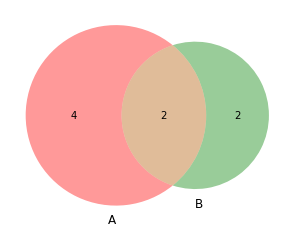

In [41]:
# operations on ensembles
a = {1, 2, 3, 4, 5, 6}
b = {5, 6, 7, 8}

print(a.issubset(b))
print(a.isdisjoint(b))
print(a.union(b))
print(a.intersection(b)) 
print(a.difference(b)) 
print(a.symmetric_difference(b)) 

#pip install matplotlib-venn
from matplotlib_venn import venn2
venn2([a, b])

## Frozenset
*Frozenset has the characteristics of a set, but its elements cannot be changed once assigned*. While tuples are immutable lists, frozensets are immutable sets. Sets being mutable are unhashable, so they can't be used as dictionary keys. On the other hand, frozensets being immutable and hashable can be used as keys into a dictionary. Frozensets can be created using the *frozenset()* function.

In [42]:
a = frozenset([1, 2, 3, 4])
b = frozenset([3, 4, 5, 6])

# ensemble-related methods work fine
print(a.issubset(b))
print(a.isdisjoint(b))
print(a.union(b))
print(a.intersection(b)) 
print(a.difference(b)) 
print(a.symmetric_difference(b)) 

# mutability-related methods fail
# s1.add(5)
# AttributeError: 'frozenset' object has no attribute 'add'

# s1.remove(3)
# AttributeError: 'frozenset' object has no attribute 'remove'

False
False
frozenset({1, 2, 3, 4, 5, 6})
frozenset({3, 4})
frozenset({1, 2})
frozenset({1, 2, 5, 6})


# Dictionary

**Implementation**: hash table, **Mutable**: yes, **Insertion order**: no, **Allows duplicates**: no in keys, yes in values

A dictionary is an unordered collection of *key:value* pairs. Each key is unique and immutable and has a value associated with it. The values associated with a key can be any object. Dictionaries are unordered and mutable. Dictionaries can have any number of pairs. The order in which pairs are added to a dictionary is not maintained and has no meaning.

In [158]:
# Creating a Dictionary with Integer Keys 
dict = {
    1: 'Geeks', 
    2: 'For', 
    3: 'Geeks'
}  
print(dict)
 
# Creating a Dictionary with Mixed keys 
dict = {
    'Name': 'Geeks', 
    1: [1, 2, 3, 4]
} 
print(dict)

# Creating a Dictionary representing a Person 
dict = {
    'Name': 'Mario', 
    'Lastname': 'Rossi',
    'Age' : 33,
} 
print(dict)

{1: 'Geeks', 2: 'For', 3: 'Geeks'}
{'Name': 'Geeks', 1: [1, 2, 3, 4]}
{'Name': 'Mario', 'Lastname': 'Rossi', 'Age': 33}


## Accessing elements
While indexing is used with other data types to access values, a dictionary uses keys. Keys can be used either inside square brackets *[]* or with the *get()* method.
If we use the square brackets *[]*, KeyError is raised in case a key is not found. On the other hand, the *get()* method returns None if the key is not found.

In [162]:
# get vs [] for retrieving elements
my_dict = {'name': 'Jack', 'age': 26}

print(my_dict.get('name'))
print(my_dict['name'])

print(my_dict.get('address'))
try:
    print(my_dict['address'])
except KeyError as e:
    print('KeyError: {}'.format(e))

Jack
Jack
None
KeyError: 'address'


## Changing elements
We can change the value of existing items using the assignment operator (=). If the key is already present, then the existing value gets updated. In case the key is not present, a new (key: value) pair is added to the dictionary.


In [172]:
my_dict = {'name': 'Loris', 'lastname': 'Batacchi', 'age': 32}

my_dict['age'] = 33
print(my_dict)

{'name': 'Loris', 'lastname': 'Batacchi', 'age': 33}


## Adding elements

In [173]:
my_dict = {'name': 'Loris', 'lastname': 'Batacchi', 'age': 32}

my_dict['address'] = 'Sant\'Arcangelo di Romagna'
print(my_dict)

{'name': 'Loris', 'lastname': 'Batacchi', 'age': 32, 'address': "Sant'Arcangelo di Romagna"}


## Removing elements
We can remove a particular item in a dictionary by using the *pop()* method. This method removes an item with the provided key and returns its value. The *popitem()* method, instead, can be used to remove and return the last (key, value) item. All the items can be removed at once, using the *clear()* method. We can also use the *del* keyword to remove individual items or the dictionary itself.

In [47]:
squares = {1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
print(squares)

# remove a particular item, returns its value
print('removed =', squares.pop(4))
print(squares)

# remove the last item (since Python 3.7+), return (key,value)
print('removed =', squares.popitem())
print(squares)

# remove an item using del
del squares[1]
print(squares)

# remove all items
squares.clear()
print(squares)

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
removed = 16
{1: 1, 2: 4, 3: 9, 5: 25}
removed = (5, 25)
{1: 1, 2: 4, 3: 9}
{2: 4, 3: 9}
{}


## Other Dictionary Operations
We can test if a key is in a dictionary using the keyword *in*. Notice that *the membership test is only for the keys and not for the values*. We can iterate through both keys and key:value pairs using a for loop.

In [48]:
squares = {1: 1, 2: 4, 3: 9}

# membership tests for key only
print(1 in squares)
print(9 in squares)

True
False


In [174]:
squares = {1: 1, 2: 4, 3: 9}

# Iterating through keys
for key in squares:
    print(key, squares[key])

1 1
2 4
3 9


In [175]:
squares = {1: 1, 2: 4, 3: 9}

# Iterating through keys
for key in squares.keys():
    print(key, squares[key])

1 1
2 4
3 9


In [176]:
squares = {1: 1, 2: 4, 3: 9}

# Iterating through values
for v in squares.values():
    print(v)

1
4
9


In [52]:
squares = {1: 1, 2: 4, 3: 9}
print(list(squares.items()))

# Iterating through keys and values using unpacking
for k, v in squares.items():
    print(k, v) 

[(1, 1), (2, 4), (3, 9)]
1 1
2 4
3 9


## OrderedDict

In the words of Raymond Hettinger, core Python developer and coauthor of OrderedDict, the class was specially designed to keep its items ordered, whereas the new implementation of dict was designed to be compact and to provide fast iteration:

> The current regular dictionary is based on the design I proposed several years ago. The primary goals of that design were compactness and faster iteration over the dense arrays of keys and values. Maintaining order was an artifact rather than a design goal. The design can maintain order but that is not its specialty.
>
> In contrast, I gave collections.OrderedDict a different design (later coded in C by Eric Snow). The primary goal was to have efficient maintenance of order even for severe workloads such as that imposed by the lru_cache which frequently alters order without touching the underlying dict. Intentionally, the OrderedDict has a design that prioritizes ordering capabilities at the expense of additional memory overhead and a constant factor worse insertion time.
>
> It is still my goal to have collections.OrderedDict have a different design with different performance characteristics than regular dicts. It has some order specific methods that regular dicts don’t have (such as a move_to_end() and a popitem() that pops efficiently from either end). The OrderedDict needs to be good at those operations because that is what differentiates it from regular dicts. (Source)


https://realpython.com/python-ordereddict/#choosing-between-ordereddict-and-dict

https://gandenberger.org/2018/03/10/ordered-dicts-vs-ordereddict/

# Comprehension Expressions

## Unpacking
Python provides some syntactic tricks for working with iterables: unpacking and enumerating. Writing clean, readable code leads to bug-free algorithms that are easy to understand. Furthermore, these tricks will also facilitate the use of other features, like comprehension-statements.

In [177]:
# assigning a list to variables using unpacking
my_list = [7, 9, 11]
x, y, z = my_list

grades = [('Ashley', 28, 27), ('Brad', 23, 26), ('Cassie', 25, 28)]

# for loop without unpacking
for entry in grades:
    print(entry)

# for loop with unpacking
for name, grade_1, grade_2 in grades:
    print(name, grade_1, grade_2)

('Ashley', 28, 27)
('Brad', 23, 26)
('Cassie', 25, 28)
Ashley 28 27
Brad 23 26
Cassie 25 28


## Enumerating
The *enumerate()* function adds a counter to an iterable and returns it. The returned object is an enumerate object. You can convert enumerate objects to lists and tuples using *list()* and *tuple()* functions respectively.

In [1]:
brands = ['Nikola', 'Rimac', 'Polestar']
e = enumerate(brands)
print(list(e))
print(type(e))

[(0, 'Nikola'), (1, 'Rimac'), (2, 'Polestar')]
<class 'enumerate'>


In [2]:
brands = ['Nikola', 'Rimac', 'Polestar']
for index, brand in enumerate(brands):
    print(index, brand)

0 Nikola
1 Rimac
2 Polestar


In [3]:
# identify indices of None elements (without enumeration)
none_indices = []
index = 0  
for item in [2, None, -10, None, 4, 8]:
    if item is None:
        none_indices.append(index)
    index += 1
print(none_indices)

[1, 3]


In [4]:
# identify indices of None elements (with enumeration)
none_indices = []
for index, item in enumerate([2, None, -10, None, 4, 8]):
    if item is None:
        none_indices.append(index)
print(none_indices)

[1, 3]


## Generators
*A generator is a special kind of iterator*, which stores the instructions for how to generate each of its members, in order, along with its current state of iterations. *A generator does not store its elements in memory but generates each member*, one at a time, as requested via iteration. 

In [185]:
import collections.abc

issubclass(types.GeneratorType, collections.abc.Iterator)

True

In [186]:
# start: 0 (default, included) # stop: 3 (excluded) # step: 1 (default) 
for i in range(3): 
    print(i) 

0
1
2


In [58]:
# start: 12 (included) # stop: 15 (excluded) # step: 1 (default) 
for i in range(12, 15): 
    print(i) 

12
13
14


In [59]:
# start: 1 (included) # stop: 10 (excluded) # step: 3
for i in range(0, 10, 2): 
    print(i) 

0
2
4
6
8


## Differences between generators and normal function

* Generator function contains one or more yield statements.
* When called, it returns an object (iterator) but does not start execution immediately.
* Methods like \_\_iter\_\_() and \_\_next\_\_() are implemented automatically. So we can iterate through the items using next().
* Once the function yields, the function is paused and the control is transferred to the caller.
* Local variables and their states are remembered between successive calls.
* Finally, when the function terminates, StopIteration is raised automatically on further calls.

In [2]:
# A simple generator function
# Generator function contains yield statements
def my_gen():
    n = 1
    print('This is printed first')
    yield n

    n += 1
    print('This is printed second')
    yield n

    n += 1
    print('This is printed at last')
    yield n

In [8]:
g = my_gen()
next(g)
next(g)
next(g)
#next(g)

This is printed first
This is printed second
This is printed at last


3

In [9]:
# Using for loop
for item in my_gen():
    print(item)

This is printed first
1
This is printed second
2
This is printed at last
3


In [24]:
def rev_str(my_str):
    length = len(my_str)
    for i in range(length - 1, -1, -1):
        yield my_str[i]


# For loop to reverse the string
for char in rev_str("hello"):
    print(char)

o
l
l
e
h


In [11]:
def fibonacci(k):
    l = [0,1]
    n = 0
    while n < k:
        l.append(sum(l))
        l.pop(0)
        n += 1
        yield l[0]
        
for f in fibonacci(3):
    print(f)

1
1
2


## Generator Comprehension
*A generator comprehension is a single-line specification for defining a generator*. It is absolutely essential to learn this syntax in order to write simple and readable code.

```
(<expression> for <var> in <iterable> [if <condition>]) 
```
Specifies the general form for a generator comprehension. This produces a generator, whose instructions for generating its members are provided within the parenthetical statement.

In [34]:
example_gen = ('hello'[i] for i in range(len('hello') - 1, -1, -1))
for item in example_gen:
    print(item)

o
l
l
e
h


In [32]:
example_gen = (i/2 for i in [0, 9, 21, 32] if i < 30)
for item in example_gen:
    print(item)

0.0
4.5
10.5


In [61]:
example_gen = ((i, i**2, i**3) for i in range(5))
for item in example_gen:
    print(item)

(0, 0, 0)
(1, 1, 1)
(2, 4, 8)
(3, 9, 27)
(4, 16, 64)


In [62]:
example_gen = (('even' if i % 2 == 0 else 'odd') for i in range(4))
for item in example_gen:
    print(item)

even
odd
even
odd


## Consuming generators
We can feed a generator to any function accepting iterators. For instance, we can feed it to the built-in sum function, which sums the contents of an iterable. This computes the sum of the sequence of numbers without ever storing the full sequence of numbers in memory.

*You must redefine the generator if you want to iterate over it again*. Defining a generator requires very few resources, so this is not a point of concern.

In [47]:
gen = (i**2 for i in range(10))
# computes the sum of a generator
print(sum(gen))

# computes the sum of ... nothing!
# the generator has already been consumed!
print(sum(gen))

285
0


In [48]:
gen = (i**2 for i in range(3))

try:
    print(next(gen))
    print(next(gen))
    print(next(gen))
    print(next(gen))
except StopIteration:
    print('StopIteration')

0
1
4
StopIteration


A generator comprehension can be specified directly as an argument to a function.

In [14]:
# providing generator expressions as arguments to functions that operate on iterables
print(sum(i for i in range(101)))
print(list(i**2 for i in range(10)))
print(any(i < 6 for i in [6, 6, 7, 7, 8, 8]))
print(all(i < 16 for i in [6, 6, 5, 7, 8, 8]))
print(', '.join(str(i) for i in [10, 200, 4000, 800]))

5050
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
False
True
10, 200, 4000, 800


## List & Tuple Comprehensions

Using generator comprehensions to initialize lists is so useful that Python actually reserves a specialized syntax for it, known as the list comprehension. A list comprehension is a syntax for constructing a list, which exactly mirrors the generator comprehension syntax:

```
[<expression> for <var> in <iterable> [if <condition>]]
```

In [15]:
# creating a list using a comprehension expression 
print(list(i**2 for i in range(5)))

# creating a tuple using a comprehension expression 
print(tuple(i**2 for i in range(5)))

[0, 1, 4, 9, 16]
(0, 1, 4, 9, 16)


In [67]:
import math
print([math.sqrt(i) for i in range(5)])

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0]


In [68]:
l = ['  Andrew  ', ' luCY   ', '    george', ' LUCAS  ']
l = [s.strip().lower() for s in l]
print(l)

['andrew', 'lucy', 'george', 'lucas']


In [69]:
# Select all words containing the char 'o' OR 'O'
word_collection = ['Python', 'Like', 'You', 'Mean', 'It']

# without list comprehension (4 lines)
out = []
for word in word_collection:
    if 'o' in word.lower():
        out.append(word)
print(out)

# with list comprehension (1 line)
out = [word for word in word_collection if 'o' in word.lower()]
print(out)

['Python', 'You']
['Python', 'You']


In [51]:
# Transform a string in a list of numbers 0 or 1
# 1 if letter is 'o'
# 0 otherwise

word = 'Hello. How Are You?'

# without comprehension
out = []
for i in word:
    if i == 'o':
        out.append(1)
    else:
        out.append(0)
print(out)

# with comprehension
out = [(1 if letter == 'o' else 0) for letter in word]
print(out)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


## Dictionary Comprehension
Dictionary comprehension is an elegant and concise way to create a new dictionary.
Dictionary comprehension consists of an expression pair (key: value) followed by a for statement inside curly braces {}.

In [71]:
# Without Dictionary Comprehension
squares = {}
for n in range(6):
    squares[n] = n**2
print(squares)

# With Dictionary Comprehension
squares = {n: n**2 for n in range(6)}
print(squares)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}


In [52]:
words = ['mother', 'spaceship', 'is', 'lifting', 'off']
too_common = ['a', 'is', 'not', 'and', 'off']
d = {word: hash(word) for word in words if word not in too_common}

# pprint stands for pretty print
import pprint
pprint.pprint(d)

{'lifting': -1658600787297277306,
 'mother': 6051358449637906722,
 'spaceship': -4001180469585927950}


# Itertools
Python has an itertools module, which provides a core set of fast, memory-efficient tools for creating iterators. The majority of these functions create generators, thus we will have to iterate over them in order to show their use (it is not possible to print them). 

There are three built-in functions, *range()*, *enumerate()*, and *zip()*, that belong to the itertools module, but they are so useful that they do not need to be imported. *It is essential that range, enumerate, and zip become tools that you are comfortable with*.

## range()
*range()* allows user to generate a series of numbers within a given range. Depending on how many arguments user is passing to the function, user can decide where that series of numbers will begin and end as well as how big the difference will be between one number and the next one.

In [73]:
print(range(10))
print(list(range(10)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [74]:
print(range(5, 10))
print(list(range(5, 10)))

range(5, 10)
[5, 6, 7, 8, 9]


In [75]:
print(range(0, 10, 3))
print(list(range(0, 10, 3)))

range(0, 10, 3)
[0, 3, 6, 9]


## enumerate()
When dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers’ task by providing a built-in function *enumerate()* for this task.
The *enumerate()* function adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.

In [76]:
print(enumerate(['apple', 'banana', 'cat', 'dog']))
print(list(enumerate(['apple', 'banana', 'cat', 'dog'])))

[(0, 'apple'), (1, 'banana'), (2, 'cat'), (3, 'dog')]


In [77]:
my_list = ['apple', 'banana', 'cat', 'dog']
for i, item in enumerate(my_list):
    print(i, item)

0 apple
1 banana
2 cat
3 dog


## zip()
The purpose of *zip()* is to map multiple containers so that they can be used as a single entity.

In [78]:
names = ['Angie', 'Brian', 'Cassie', 'David']
exam_1_scores = [90, 82, 79, 87]
exam_2_scores = [95, 84, 72, 91]

print(zip(names, exam_1_scores, exam_2_scores))
print(list(zip(names, exam_1_scores, exam_2_scores)))

for name, grade_1, grade_2 in zip(names, exam_1_scores, exam_2_scores):
    print(name, grade_1, grade_2)

[('Angie', 90, 95), ('Brian', 82, 84), ('Cassie', 79, 72), ('David', 87, 91)]
Angie 90 95
Brian 82 84
Cassie 79 72
David 87 91


# Sorting Iterables

## Using sort() and sorted()

Both *list.sort()* and *sorted()* can be used for sorting. Both support a *key* parameter to specify a function (or other callable) to be called on each element prior to making comparisons needed for ordering.

The value of the key parameter should be a function (or other callable) that takes a single argument and returns a key to use for sorting purposes. This technique is fast because the key function is called exactly once for each input record.

In [53]:
# sorting tuples
car_tuples = [
    ('BMW', 'M2', 200),
    ('Rimac', 'Concept One', 300),
    ('Fiat', '500E', 100),
]

car_dict = [
    {'brand' : 'BMW', 'model' : 'M2', 'speed' : 200},
    {'brand' : 'Rimac', 'model' : 'Concept One', 'speed' : 300},
    {'brand' : 'Fiat', 'model' : '500E', 'speed' : 100},
]

# sort by brand
print(sorted(car_tuples, key=lambda car : car[2], reverse=True))
print(sorted(car_dict, key=lambda car : car['brand'], reverse=True))

[('Rimac', 'Concept One', 300), ('BMW', 'M2', 200), ('Fiat', '500E', 100)]
[{'brand': 'Rimac', 'model': 'Concept One', 'speed': 300}, {'brand': 'Fiat', 'model': '500E', 'speed': 100}, {'brand': 'BMW', 'model': 'M2', 'speed': 200}]


## The operator module

The key-function patterns shown above are very common, so Python provides convenience functions to make accessor functions easier and faster. The *operator* module has *itemgetter()*, *attrgetter()*, and a *methodcaller()* function. *itemgetter()* fetches items from an iterable, while *attrgetter()* fetches attributes from objects.

In [80]:
import operator
print(sorted(car_tuples, key=operator.itemgetter(0)))
print(sorted(car_tuples, key=operator.itemgetter(1)))

[('BMW', 'M2', 200), ('Fiat', '500E', 100), ('Rimac', 'Concept One', 300)]
[('Fiat', '500E', 100), ('Rimac', 'Concept One', 300), ('BMW', 'M2', 200)]


## Sorting on multiple levels
The *operator* module functions allows multiple levels of sorting. For example, to sort by grade then by age:

In [81]:
import operator
print(sorted(car_tuples, key=operator.itemgetter(0, 1)))
print(sorted(car_tuples, key=operator.itemgetter(1, 2)))

[('BMW', 'M2', 200), ('Fiat', '500E', 100), ('Rimac', 'Concept One', 300)]
[('Fiat', '500E', 100), ('Rimac', 'Concept One', 300), ('BMW', 'M2', 200)]


# Copying Iterables

## Shallow copy

The easiest way to copy a list (or most built-in mutable collections) is to use the built-in constructor for the type itself. For lists and other mutable sequences, the shortcut l2 = l1[:] also makes a copy. 

In [82]:
l1 = [1, 2, [3, 4], (5, 6)]
l2 = list(l1)
l3 = l1[:]
print(l2 == l1)
print(l3 == l1)
print(l2 is l1)
print(l3 is l1)

True
True
False
False


However, these approaches produce shallow copies (i.e., the outermost container is duplicated, but the copy is filled with references to the same items held by the original container). This saves memory and causes no problems if all the items are immutable. But if there are mutable items, this may lead to unpleasant surprises. [pythontutor](http://www.pythontutor.com/) allows for visualizing code as the examples below show.

|                |              | 
| :------------- | :----------: |
|  ![alt](images/obj_copy_1.png)| | 

What happens when innermost iterable containers are modified?

In [83]:
l1 = [1, 2, [3, 4], (5, 6)]
l2 = list(l1)
print('l1:', l1)
print('l2:', l2)

# the copy (l2) gets modified
l2.append('*')
l2[2] = [3, 4, '*']
l2[3] = (5, 6, '*')
print('l1:', l1)
print('l2:', l2)

l1: [1, 2, [3, 4], (5, 6)]
l2: [1, 2, [3, 4], (5, 6)]
l1: [1, 2, [3, 4], (5, 6)]
l2: [1, 2, [3, 4, '*'], (5, 6, '*'), '*']


|  Before        |  After       | 
| :------------- | :----------: |
|  ![alt](images/obj_copy_1.png) | ![alt](images/obj_copy_2.png)   | 



In [84]:
l1 = [1, 2, [3, 4], (5, 6)]
l2 = list(l1)
print('l1:', l1)
print('l2:', l2)

# the copy (l2) gets modified
l2.append('*')
l2[2].append('*')
l2[3] = (5, 6, '*')
print('l1:', l1)
print('l2:', l2)

l1: [1, 2, [3, 4], (5, 6)]
l2: [1, 2, [3, 4], (5, 6)]
l1: [1, 2, [3, 4, '*'], (5, 6)]
l2: [1, 2, [3, 4, '*'], (5, 6, '*'), '*']


|  Before        |  After       | 
| :------------- | :----------: |
|  ![alt](images/obj_copy_1.png) | ![alt](images/obj_copy_3.png)   | 



## Deep copy
Deep copies (completely separate copies) can be obtained by making use of the *copy* module.

In [85]:
# shallow copy
l1 = [1, 2, [3, 4], (5, 6)]
l2 = list(l1)
print(l2 == l1)
print(l2 is l1)

# deep copy
import copy
l1 = [1, 2, [3, 4], (5, 6)]
l2 = copy.deepcopy(l1)
print(l2 == l1)
print(l2 is l1)

True
False
True
False


|  Shallow Copy  |  Deep Copy   | 
| :------------- | :----------: |
|  ![alt](images/obj_copy_1.png) | ![alt](images/obj_copy_4.png)   |